In [1]:
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_colwidth', None)

# Define all thresholds you want
percentile_values = [10, 20, 30, 40, 50, 60, 70, 80, 90]

def compute_percentiles(file_paths, model_name):
    """Compute percentiles for a list of CSVs from one model type."""
    results = []
    for i, f in enumerate(file_paths, start=1):
        df = pd.read_csv(f)
        scores = df["average_score"].dropna()

        # Build result dictionary
        percentiles = {"Model": model_name, "Experiment": f"Exp{i}"}
        for p in percentile_values:
            percentiles[f"P{p}"] = np.percentile(scores, p)

        results.append(percentiles)

    return pd.DataFrame(results)


# === Paths ===
gcn_files = [
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp1/Results/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp2/Results/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp3/Results/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp4/Results/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp5/Results/SpyCaptureRates.csv",
]

gat_files = [
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp1v2/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp2v2/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp3v2/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp4v2/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp5v2/NewResults/SpyCaptureRates.csv",
]

gnn_files = [
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp1/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp2/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp3/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp4/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp5/NewResults/SpyCaptureRates.csv",
]

cnn_files = [
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp1/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp2/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp3/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp4/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp5/NewResults/SpyCaptureRates.csv",
]

new_cnn_files = [
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp1/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp2/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp3/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp4/NewResults/SpyCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp5/NewResults/SpyCaptureRates.csv",
]


# === Compute for all models ===
gcn_df = compute_percentiles(gcn_files, "GCN")
gat_df = compute_percentiles(gat_files, "GAT")
gnn_df = compute_percentiles(gnn_files, "GNN")
cnn_df = compute_percentiles(cnn_files, "3DCNN")
new_cnn_df = compute_percentiles(new_cnn_files, "New3DCNN")

# Combine into one dataframe
all_percentiles_df = pd.concat([gcn_df, gat_df, gnn_df, cnn_df, new_cnn_df], ignore_index=True)

print(all_percentiles_df)


       Model Experiment       P10       P20       P30       P40       P50  \
0        GCN       Exp1  0.464465  0.642338  0.710743  0.757714  0.794645   
1        GCN       Exp2  0.505917  0.664712  0.722688  0.785597  0.823733   
2        GCN       Exp3  0.582932  0.667258  0.738991  0.781225  0.819758   
3        GCN       Exp4  0.462995  0.608748  0.688471  0.747551  0.799679   
4        GCN       Exp5  0.491243  0.626034  0.703587  0.773302  0.813436   
5        GAT       Exp1  0.463232  0.617625  0.696774  0.764221  0.808170   
6        GAT       Exp2  0.411973  0.507951  0.670544  0.759494  0.840388   
7        GAT       Exp3  0.536549  0.642081  0.725753  0.800169  0.841336   
8        GAT       Exp4  0.417688  0.542513  0.678491  0.739588  0.798318   
9        GAT       Exp5  0.447784  0.619902  0.705228  0.792995  0.853644   
10       GNN       Exp1  0.492525  0.659406  0.686243  0.733350  0.766796   
11       GNN       Exp2  0.505141  0.706885  0.746329  0.769012  0.794622   

In [2]:
# Build a lookup: (Model, Experiment) -> dict of percentiles
spy_pct_lookup = {
    (row["Model"], row["Experiment"]): row
    for _, row in all_percentiles_df.iterrows()
}

# ====== 2) Apply labels to TestPositive files using those percentiles ======
# Paths to TestPositive CSVs (in same order/Exp index as spies lists above)
gcn_pos = [
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp1/Results/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp2/Results/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp3/Results/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp4/Results/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp5/Results/TestPositiveCaptureRates.csv",
]
gat_pos = [
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp1v2/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp2v2/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp3v2/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp4v2/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp5v2/NewResults/TestPositiveCaptureRates.csv",
]
gnn_pos = [
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp1/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp2/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp3/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp4/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp5/NewResults/TestPositiveCaptureRates.csv",
]
cnn_pos = [
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp1/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp2/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp3/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp4/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp5/NewResults/TestPositiveCaptureRates.csv",
]

new_cnn_pos = [
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp1/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp2/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp3/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp4/NewResults/TestPositiveCaptureRates.csv",
    "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp5/NewResults/TestPositiveCaptureRates.csv",
]

model_to_pos_files = {
    "GCN": gcn_pos,
    "GAT": gat_pos,
    "GNN": gnn_pos,
    "3DCNN": cnn_pos,
    "New3DCNN": new_cnn_pos,
}

# Threshold pairs to apply
pairs = [(10, 90), (20, 80), (30, 70), (40, 60)]

def label_from_thresholds(score, p_low, p50, p_high):
    if np.isnan(score) or np.isnan(p_low) or np.isnan(p50) or np.isnan(p_high):
        return np.nan
    if score < p_low:
        return "StrongNegative"
    elif score < p50:
        return "PseudoNegative"
    elif score <= p_high:
        return "PseudoPositive"
    else:
        return "StrongPositive"

def save_with_new_name(path, suffix="_percentile_labels"):
    base, ext = os.path.splitext(path)
    return f"{base}{suffix}{ext}"

# Apply per model × experiment (Exp index matched by list order)
for model, pos_files in model_to_pos_files.items():
    for i, pos_csv in enumerate(pos_files, start=1):
        exp_key = (model, f"Exp{i}")
        if exp_key not in spy_pct_lookup:
            print(f"[WARN] Missing spies percentiles for {exp_key}; skipping {pos_csv}")
            continue

        pct = spy_pct_lookup[exp_key]  # Series with P10..P90, includes P50
        dfp = pd.read_csv(pos_csv)
        if "average_score" not in dfp.columns:
            print(f"[WARN] 'average_score' not in {pos_csv}; skipping.")
            continue

        # Add one column per (low, high) pair
        for low, high in pairs:
            col = f"percentile_label_{low}_{high}"
            p_low  = pct.get(f"P{low}",  np.nan)
            p_high = pct.get(f"P{high}", np.nan)
            p50    = pct.get("P50",      np.nan)
            dfp[col] = dfp["average_score"].apply(
                lambda s: label_from_thresholds(s, p_low, p50, p_high)
            )

        # (Optional) also store the cut values used for traceability
        for p in [10,20,30,40,50,60,70,80,90]:
            dfp[f"cut_P{p}"] = pct.get(f"P{p}", np.nan)

        out_path = save_with_new_name(pos_csv)  # e.g., .../TestPositiveCaptureRates_percentile_labels.csv
        dfp.to_csv(out_path, index=False)
        print(f"[OK] Wrote labels → {out_path}")

[OK] Wrote labels → ../../../Models/Cholesterol/GCN/GCN-5A_Exp1/Results/TestPositiveCaptureRates_percentile_labels.csv
[OK] Wrote labels → ../../../Models/Cholesterol/GCN/GCN-5A_Exp2/Results/TestPositiveCaptureRates_percentile_labels.csv
[OK] Wrote labels → ../../../Models/Cholesterol/GCN/GCN-5A_Exp3/Results/TestPositiveCaptureRates_percentile_labels.csv
[OK] Wrote labels → ../../../Models/Cholesterol/GCN/GCN-5A_Exp4/Results/TestPositiveCaptureRates_percentile_labels.csv
[OK] Wrote labels → ../../../Models/Cholesterol/GCN/GCN-5A_Exp5/Results/TestPositiveCaptureRates_percentile_labels.csv
[OK] Wrote labels → ../../../Models/Cholesterol/GAT/GATModels-5A_exp1v2/NewResults/TestPositiveCaptureRates_percentile_labels.csv
[OK] Wrote labels → ../../../Models/Cholesterol/GAT/GATModels-5A_exp2v2/NewResults/TestPositiveCaptureRates_percentile_labels.csv
[OK] Wrote labels → ../../../Models/Cholesterol/GAT/GATModels-5A_exp3v2/NewResults/TestPositiveCaptureRates_percentile_labels.csv
[OK] Wrote labe

/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:

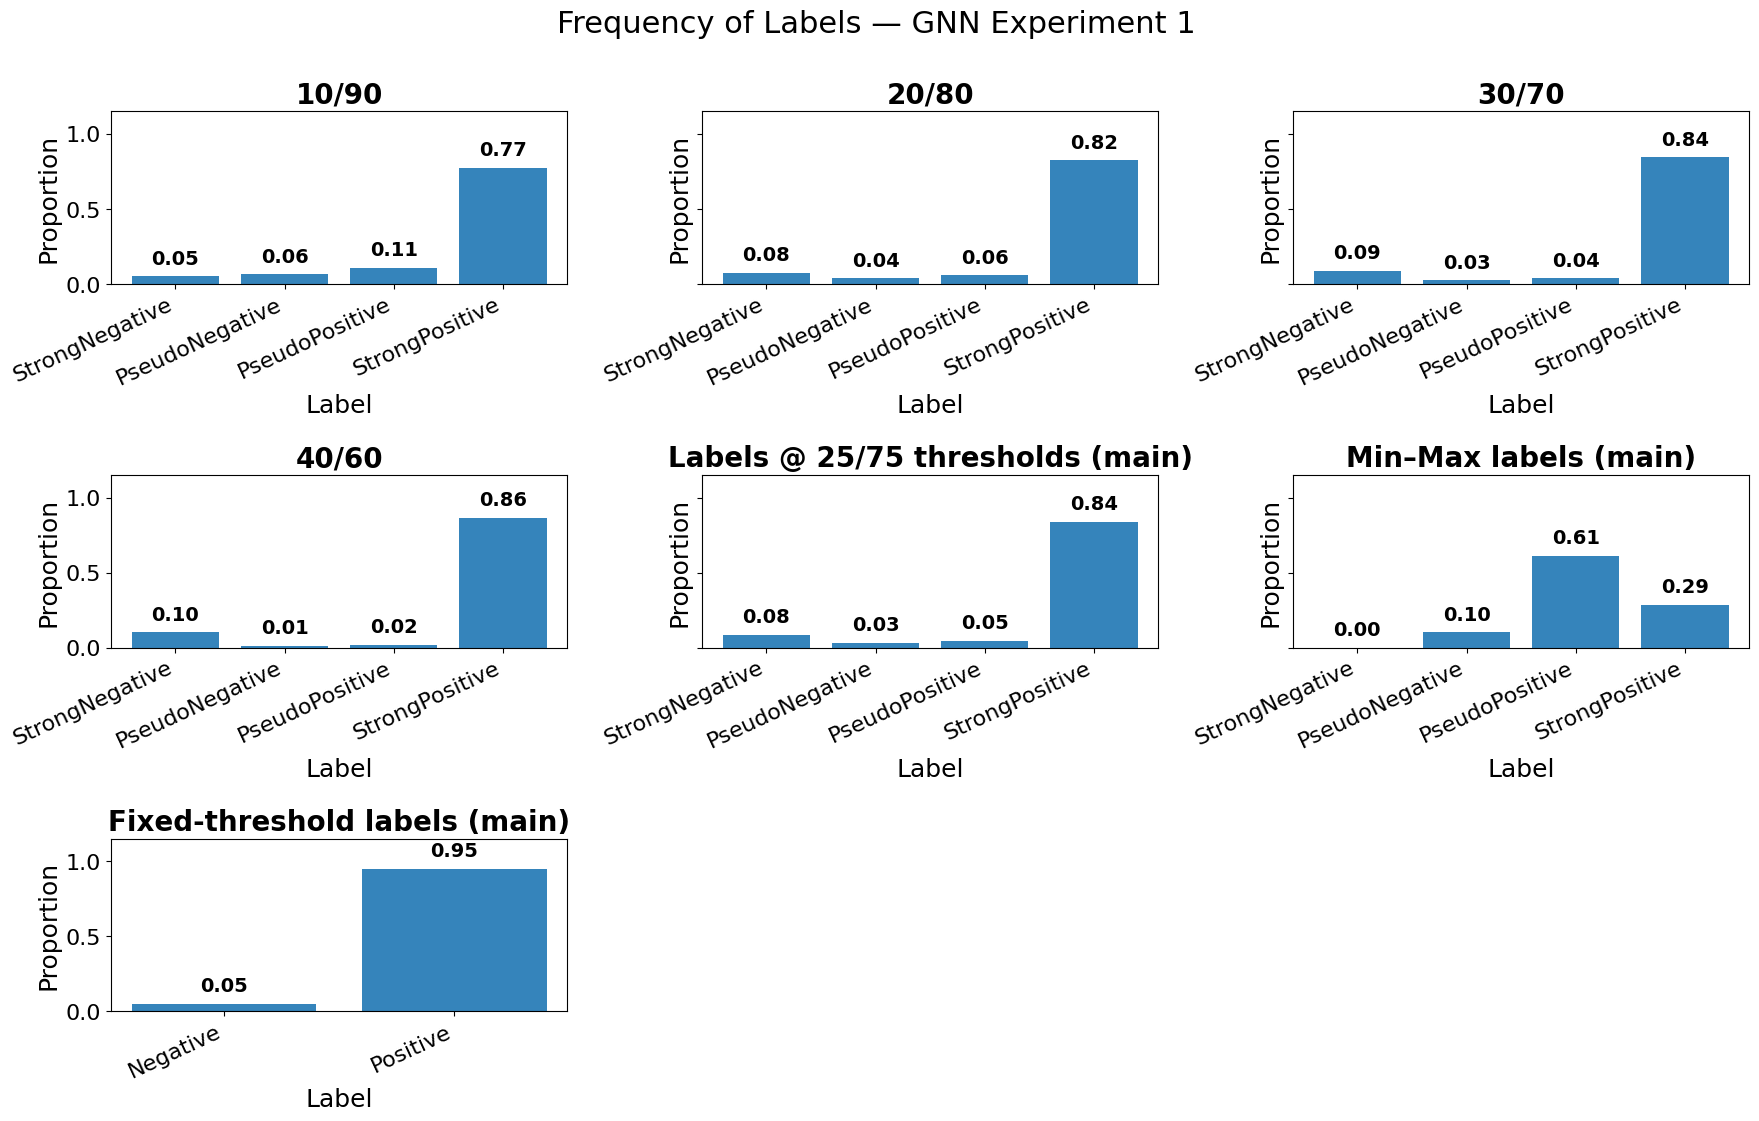

/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:

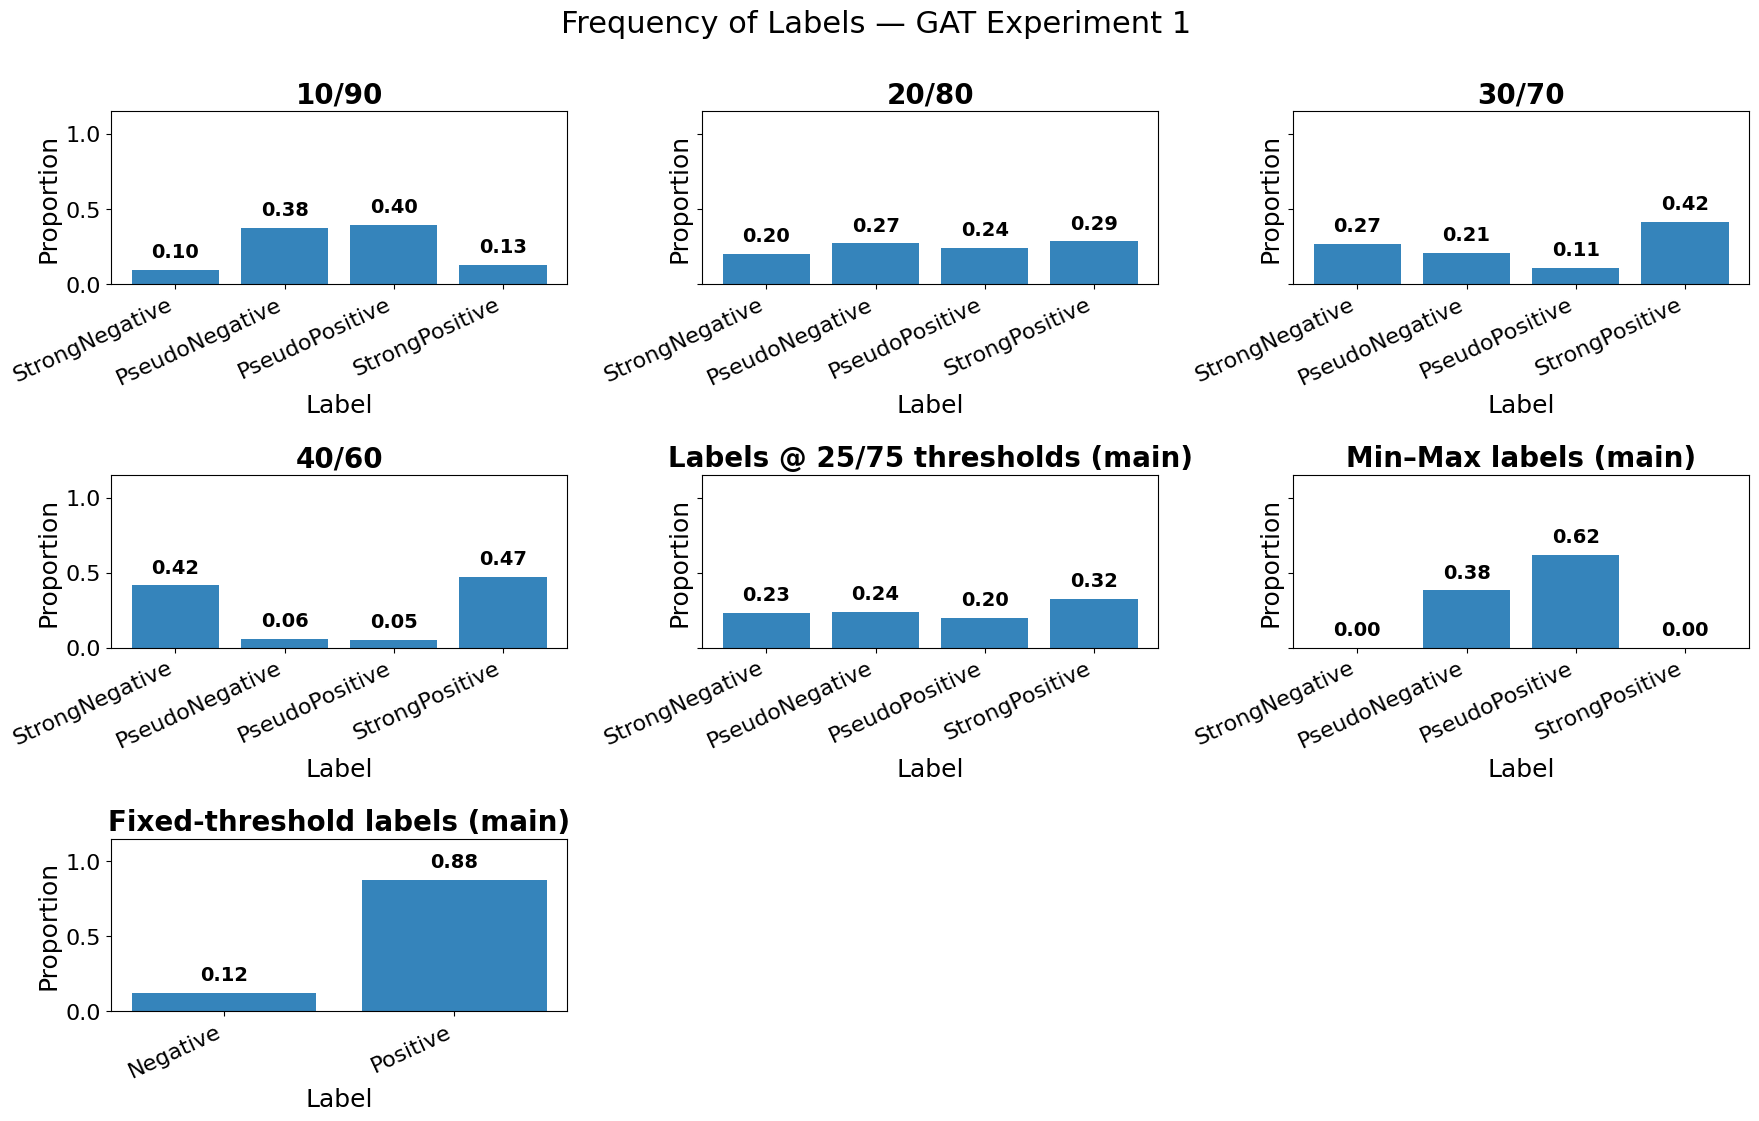

/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:

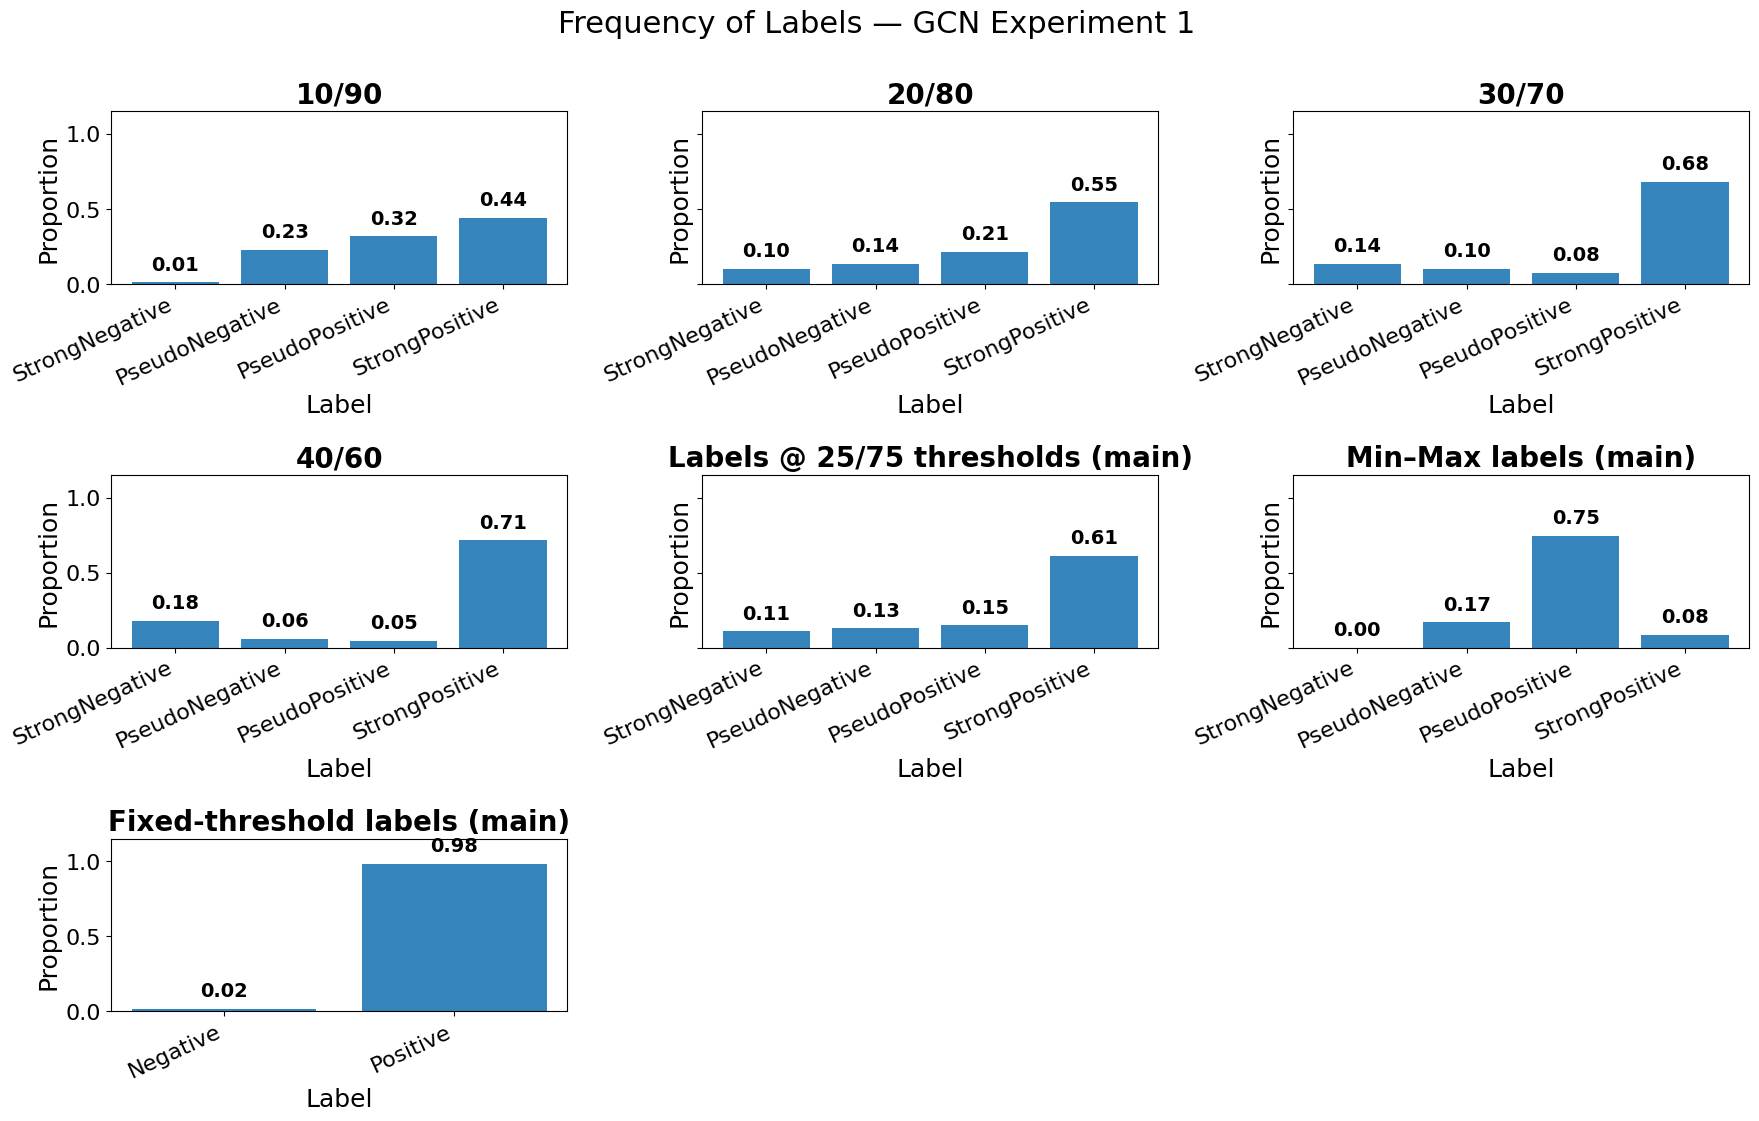

/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:

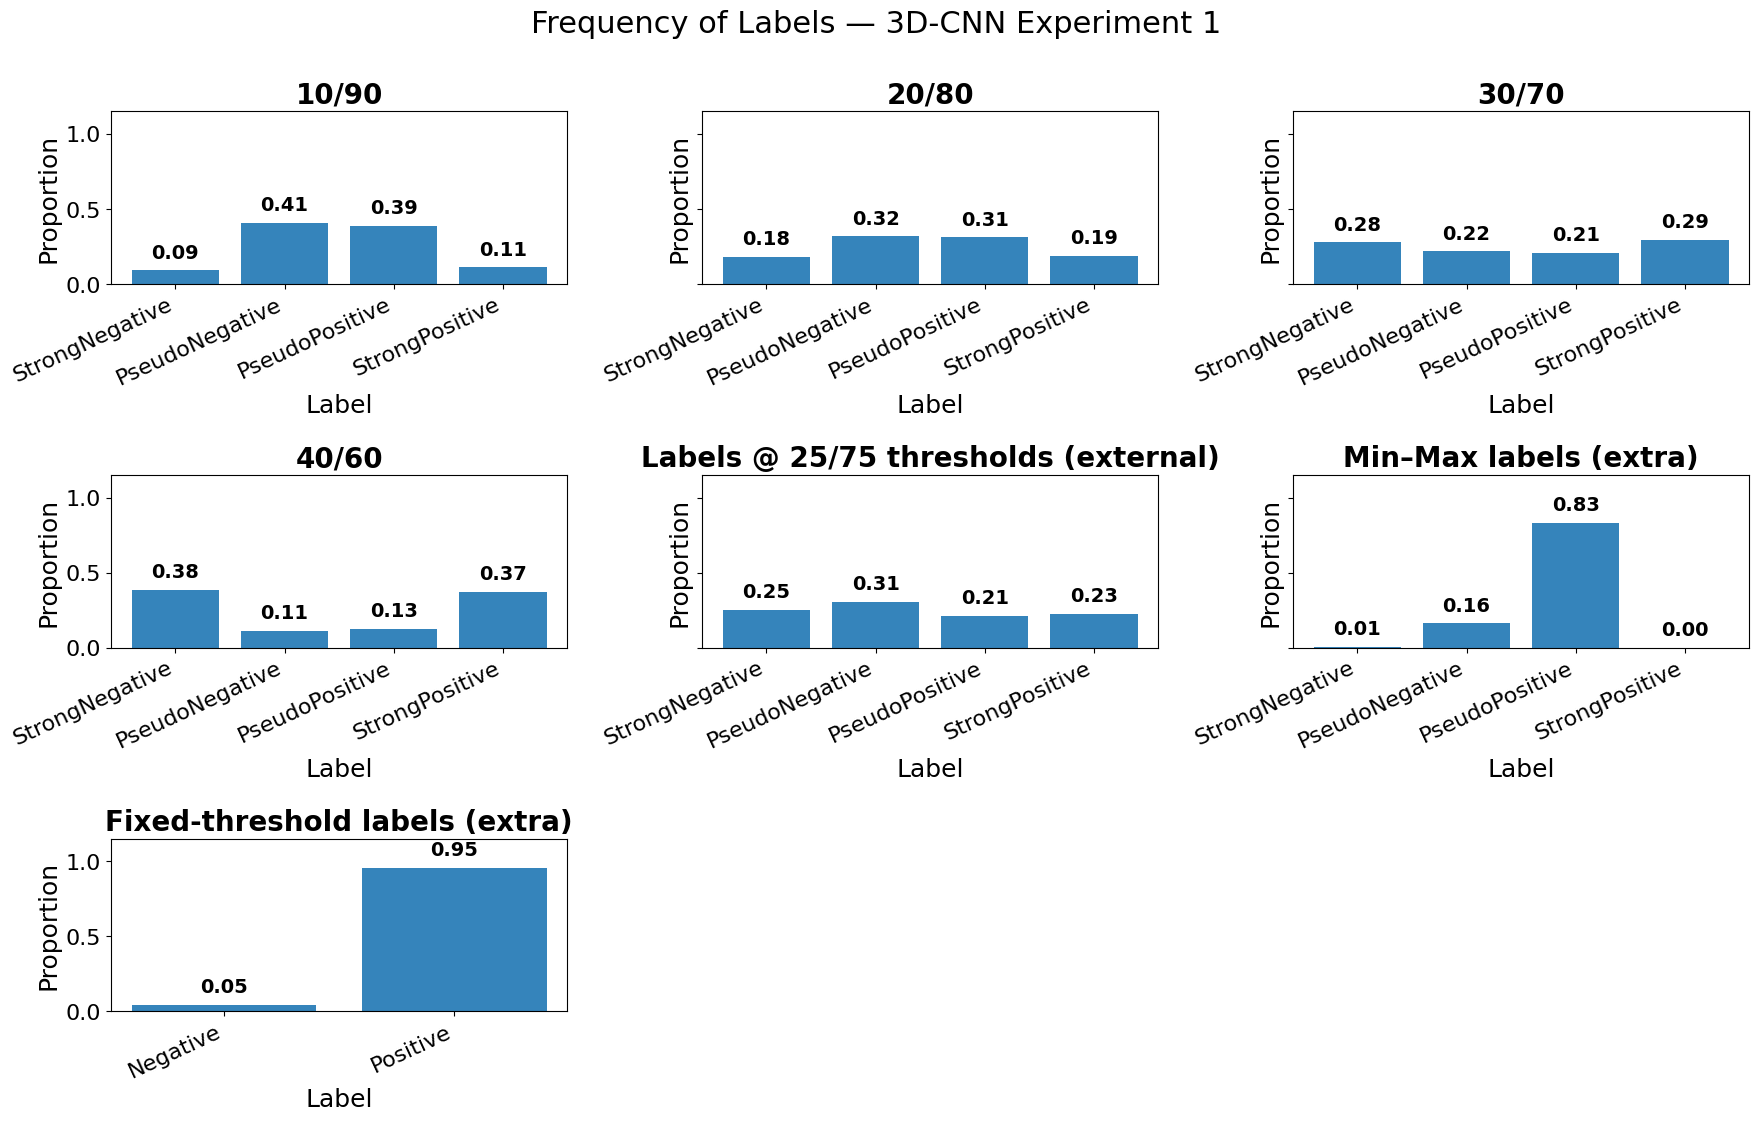

/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:169: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
/tmp/ipykernel_1966880/524201328.py:

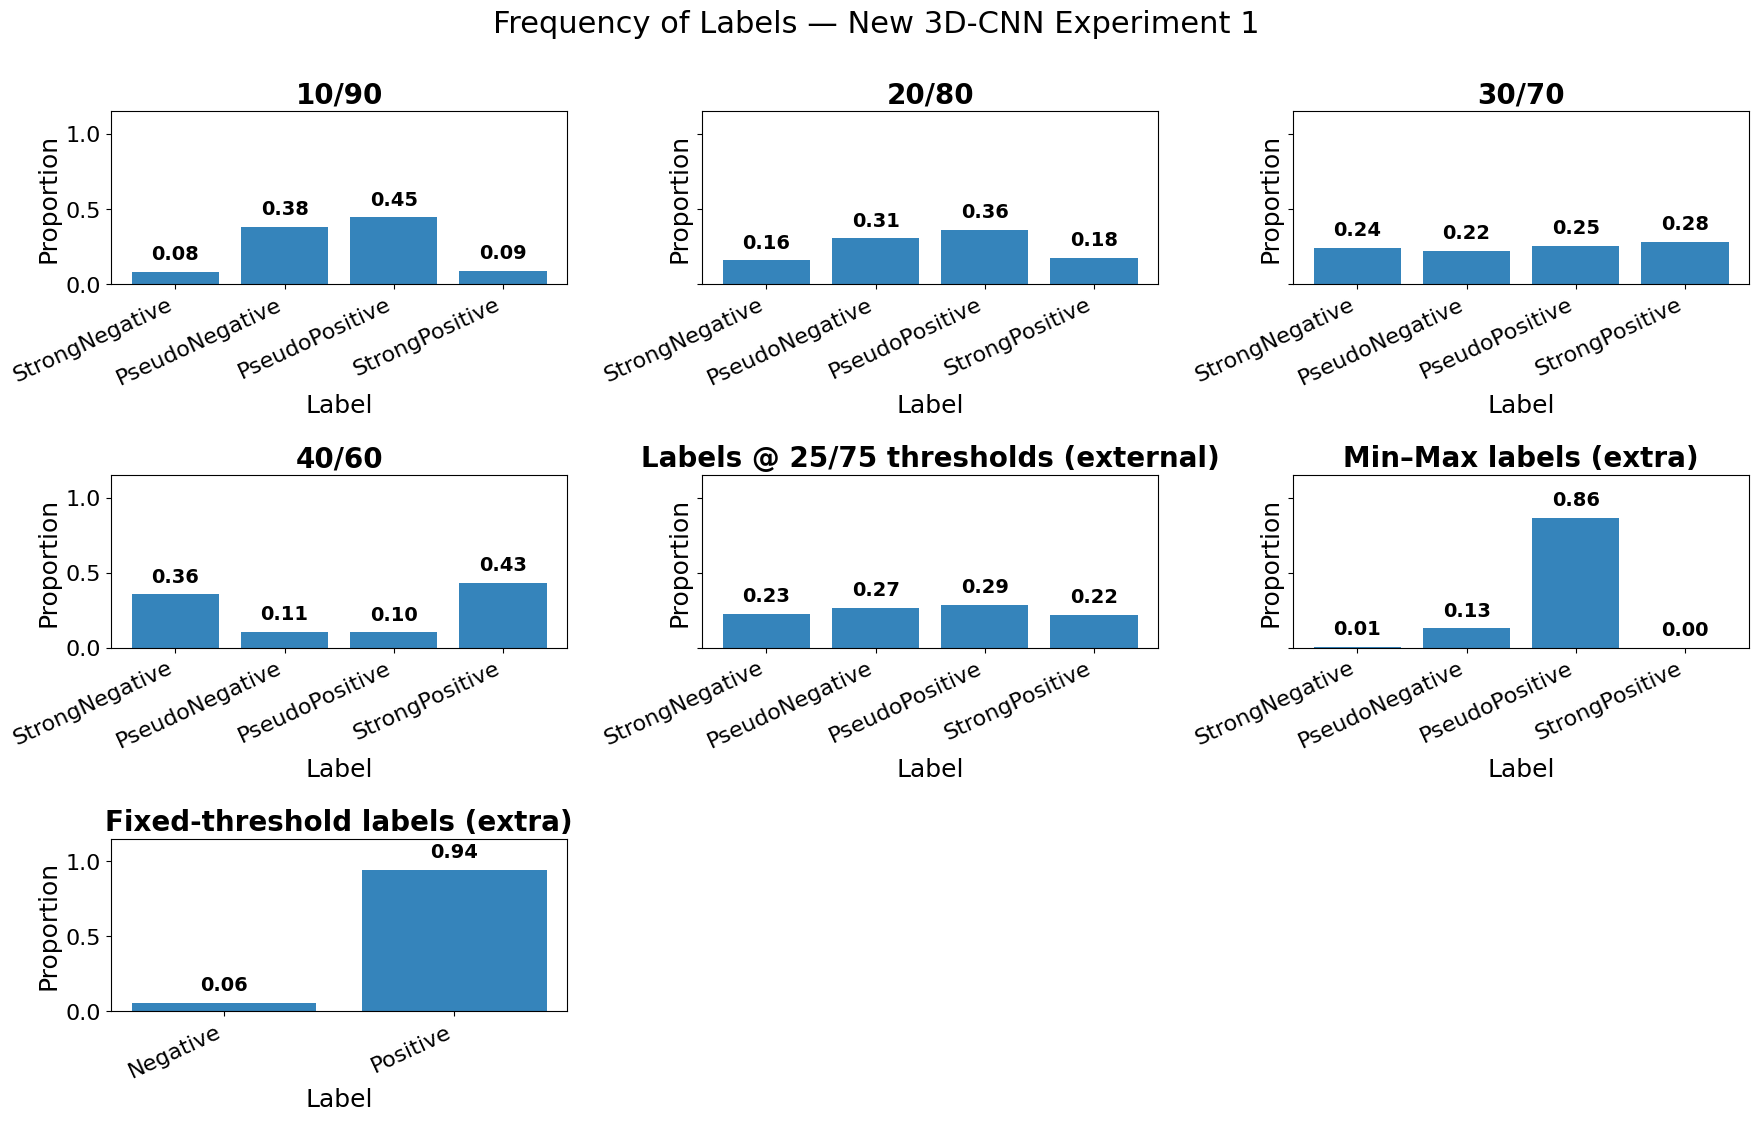

In [3]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

def plot_thresholds(
    csv_path,
    model_name,
    extra_csv_path=None,                # pass for 3D-CNN separate 25/75 file
    extra_label_col="percentile_label", # name of the 25/75 column in extra CSV
    extra_title="Labels @ 25/75 thresholds",
    include_main_25_75=True,            # plot 25/75 from main CSV if present
    prefer_extra_25_75=True,            # if extra_csv_path provided, prefer it over main
    # NEW: include two extra columns
    include_min_max=True,
    include_threshold=True,
    # If extra_csv_path is provided, prefer its min_max/threshold cols over main
    prefer_extra_misc=True,
    proportions=False,                  # True → proportions; False → counts
    save_png=False
):
    """
    Plots frequency of labels for multiple percentile-threshold schemes, plus:
      - min_max_label
      - threshold_label

    Sources:
      - Main CSV: percentile_label_10_90, _20_80, _30_70, _40_60  (and optionally percentile_label)
      - Optional extra CSV: a separate 25/75 column (e.g., 3D-CNN), and possibly min_max_label/threshold_label

    Behavior:
      - If include_main_25_75 and main has 'percentile_label', include it.
      - If extra_csv_path is provided and has extra_label_col:
          * if prefer_extra_25_75=True, the extra panel replaces the main 25/75
          * else, both panels are shown.
      - For min_max_label and threshold_label:
          * If prefer_extra_misc=True and extra CSV has them, use extra; otherwise fallback to main CSV.
    """
    plt.rcParams.update({
        "font.size": 18,        # default text size
        "axes.titlesize": 20,   # subplot titles
        "axes.labelsize": 18,   # x and y labels
        "xtick.labelsize": 16,  # x tick labels
        "ytick.labelsize": 16,  # y tick labels
        "legend.fontsize": 16,  # legend
        "figure.titlesize": 22  # figure title
    })


    pairs = [(10, 90), (20, 80), (30, 70), (40, 60)]
    pair_to_col = { (lo, hi): f"percentile_label_{lo}_{hi}" for (lo, hi) in pairs }
    label_order = ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"]

    # ---- Load main CSV
    df = pd.read_csv(csv_path)

    # Optional extra CSV
    df_extra = None
    if extra_csv_path:
        try:
            df_extra = pd.read_csv(extra_csv_path)
        except Exception as e:
            print(f"[WARN] Could not read extra CSV '{extra_csv_path}': {e}")

    # ---- Collect panels to plot
    counts_per_panel = OrderedDict()

    # Main CSV (10/90..40/60)
    missing_pairs = [c for c in pair_to_col.values() if c not in df.columns]
    if missing_pairs:
        print(f"[WARN] Missing in {os.path.basename(csv_path)}: {missing_pairs}")

    for (lo, hi), col in pair_to_col.items():
        if col in df.columns:
            counts = df[col].value_counts().reindex(label_order, fill_value=0)
            counts_per_panel[f"{lo}/{hi}"] = counts

    # Optional: 25/75 from main CSV
    main_25_75_title = "Labels @ 25/75 thresholds (main)"
    main_has_25_75 = ("percentile_label" in df.columns)
    if include_main_25_75 and main_has_25_75:
        counts = df["percentile_label"].value_counts().reindex(label_order, fill_value=0)
        counts_per_panel[main_25_75_title] = counts

    # Optional: 25/75 from extra CSV (e.g., 3D-CNN)
    extra_added = False
    if df_extra is not None and extra_label_col in df_extra.columns:
        counts = df_extra[extra_label_col].value_counts().reindex(label_order, fill_value=0)
        # Prefer extra over main?
        if prefer_extra_25_75 and main_25_75_title in counts_per_panel:
            counts_per_panel.pop(main_25_75_title, None)
        counts_per_panel[extra_title] = counts
        extra_added = True
    elif extra_csv_path and df_extra is not None:
        print(f"[WARN] '{extra_label_col}' not found in {os.path.basename(extra_csv_path)}; skipping extra 25/75 panel.")

    # ---- NEW: min_max_label and threshold_label
    def pick_source(colname):
        """Pick which dataframe (extra or main) to use for a given column."""
        if prefer_extra_misc and df_extra is not None and colname in df_extra.columns:
            return df_extra, "extra"
        elif colname in df.columns:
            return df, "main"
        elif df_extra is not None and colname in df_extra.columns:
            # fallback to extra even if not preferred, if main doesn't have it
            return df_extra, "extra"
        return None, None

    if include_min_max:
        src_df, src_name = pick_source("min_max_label")
        if src_df is not None:
            counts = src_df["min_max_label"].value_counts().reindex(label_order, fill_value=0)
            title = "Min–Max labels" + (f" ({src_name})" if src_name else "")
            counts_per_panel[title] = counts
        else:
            print("[WARN] 'min_max_label' not found in main or extra CSV; skipping.")

    if include_threshold:
        src_df, src_name = pick_source("threshold_label")
        if src_df is not None:
            # Use the original binary labels, not mapped
            binary_order = ["Negative", "Positive"]
            counts = src_df["threshold_label"].value_counts().reindex(binary_order, fill_value=0)
            title = "Fixed-threshold labels" + (f" ({src_name})" if src_name else "")
            counts_per_panel[title] = (counts, binary_order)  # store both counts + custom order
        else:
            print("[WARN] 'threshold_label' not found in main or extra CSV; skipping.")


    if not counts_per_panel:
        raise ValueError("No label columns found to plot. Run labeling first or check column names.")

    # ---- Layout
    n = len(counts_per_panel)
    cols = 2 if n <= 4 else 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 3.8*rows), sharey=True)
    if isinstance(axes, plt.Axes):
        axes = [axes]
    else:
        axes = axes.flatten()

    ymax = 0.0
    for ax, (title, counts_data) in zip(axes, counts_per_panel.items()):
        if isinstance(counts_data, tuple):
            counts, local_order = counts_data
        else:
            counts, local_order = counts_data, label_order

        vals = counts.values.astype(float)
        if proportions:
            total = vals.sum() if vals.sum() > 0 else 1.0
            vals = vals / total

        bars = ax.bar(local_order, vals, alpha=0.9)
        for b, v in zip(bars, vals):
            txt = f"{v:.2f}" if proportions else f"{int(v)}"
            ax.annotate(
                txt, (b.get_x() + b.get_width()/2, v),
                xytext=(0, 6), textcoords="offset points",
                ha='center', va='bottom',
                fontsize=14, fontweight="bold"   # <--- bigger bar labels
            )

        ax.set_title(title, fontsize=20, fontweight="bold")
        ax.set_xlabel("Label", fontsize=18)
        ax.set_xticklabels(local_order, rotation=25, ha='right', fontsize=16)
        ax.set_ylabel("Proportion" if proportions else "Count", fontsize=18)
        ymax = max(ymax, float(vals.max()) if len(vals) else 0.0)

    fig.suptitle(f"Frequency of Labels — {model_name}", y=0.99, fontsize=24, fontweight="bold")

    # Remove unused axes
    for j in range(len(counts_per_panel), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Frequency of Labels — {model_name}", y=0.99)
    for ax in fig.axes:
        ax.set_ylim(0, (1.0 if proportions else max(1, int(ymax))) * 1.15)

    fig.tight_layout()

    if save_png:
        base, _ = os.path.splitext(csv_path)
        tag = "_props" if proportions else "_counts"
        extra_tag = "_with_ext2575" if extra_added else ""
        out_png = f"{base}{extra_tag}{tag}.png"
        fig.savefig(out_png, dpi=150, bbox_inches="tight")
        print(f"[OK] Saved → {out_png}")

    plt.show()

# ======================
# Usage examples
# ======================

prop = True

# GNN/GAT/GCN — will include 25/75 from main file if present
plot_thresholds(
    "../../../Models/Cholesterol/GNN/GNN-5A_Exp1/NewResults/TestPositiveCaptureRates_percentile_labels.csv",
    "GNN Experiment 1",
    proportions=prop
)

plot_thresholds(
    "../../../Models/Cholesterol/GAT/GATModels-5A_exp1v2/NewResults/TestPositiveCaptureRates_percentile_labels.csv",
    "GAT Experiment 1",
    proportions=prop
)

plot_thresholds(
    "../../../Models/Cholesterol/GCN/GCN-5A_Exp1/Results/TestPositiveCaptureRates_percentile_labels.csv",
    "GCN Experiment 1",
    proportions=prop
)

# 3D-CNN — 25/75 lives in a different CSV; pass it so it appears in the same figure
plot_thresholds(
    csv_path="../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp1/NewResults/TestPositiveCaptureRates_percentile_labels.csv",
    model_name="3D-CNN Experiment 1",
    extra_csv_path="../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp1/NewResults/TestPositiveCaptureRates_labeled.csv",
    extra_label_col="percentile_label",
    extra_title="Labels @ 25/75 thresholds (external)",
    proportions=prop
)

plot_thresholds(
    csv_path="../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp1/NewResults/TestPositiveCaptureRates_percentile_labels.csv",
    model_name="New 3D-CNN Experiment 1",
    extra_csv_path="../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp1/NewResults/TestPositiveCaptureRates_labeled.csv",
    extra_label_col="percentile_label",
    extra_title="Labels @ 25/75 thresholds (external)",
    proportions=prop
)

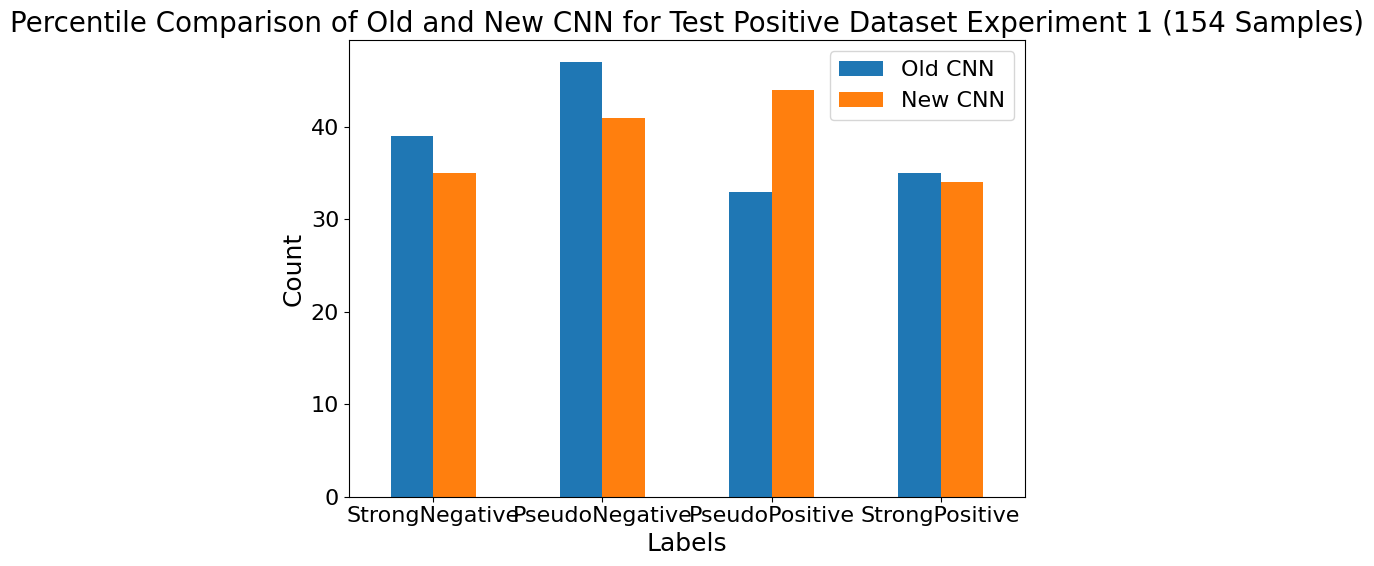

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
old_cnn = pd.read_csv("../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp1/NewResults/TestPositiveCaptureRates_labeled.csv")
new_cnn = pd.read_csv("../../../Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp1/NewResults/TestPositiveCaptureRates_labeled.csv")

# Pick the column to compare
column = "percentile_label"   # could also try "percentile_label" or "threshold_label"

# Define desired order of categories
label_order = ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"]

# Count occurrences in each df
old_counts = old_cnn[column].value_counts().reindex(label_order, fill_value=0)
new_counts = new_cnn[column].value_counts().reindex(label_order, fill_value=0)

# Combine into one dataframe
compare_df = pd.DataFrame({
    "Old CNN": old_counts,
    "New CNN": new_counts
}, index=label_order)

# Plot side by side
ax = compare_df.plot(kind="bar", figsize=(8, 6))
ax.set_xlabel("Labels")
ax.set_ylabel("Count")
ax.set_title(f"Percentile Comparison of Old and New CNN for Test Positive Dataset Experiment 1 (154 Samples)")
plt.xticks(rotation=0)  # keep labels horizontal
plt.tight_layout()
plt.show()
